In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF
import numpy as np
import pickle
import warnings  
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# import nltk 
# from nltk.corpus import stopwords
# from nltk import word_tokenize, pos_tag
# from nltk.stem import PorterStemmer
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

ab


In [10]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500
# Read file
df1 = pd.read_pickle('data_prep.pkl')

In [11]:
df1.head()

,content,Doc_Id,word_count,data_nouns,cleaned
3,不满，一岁，的，永康，是，个，饱经，病痛，折磨，的，孩子，，，２，０，１，１，年，７，月，５，日，出生，的，他，，，患有，先天性，心脏病，、，疝气，，，一，出生，便，被遗弃，。，２，０，１，２，年，１，月，８，日，，，才，５，个，月，大，的，永康，被，发现，呼吸困难，，，随后，送往，医院，进行，抢救，治疗，，，病情，稳定，后于，１，月，２，８，日，出院，。，，２，０，１，２，年，２，月，１，３，号，，，永康，在，思源，焦点，公益，基金，的，帮助，下，在，医院，接受，手术，治疗，，，术后，仅，８，天，，，永康，突发，右侧，腹股沟，斜，疝，嵌顿，及，肠梗阻，，，又，再次，进行，抢救，治疗，，，术后，进，重症，监护室，。，３，月，７，日，，，几经，病痛，折磨，的，永康，终于，康复，出院，，，目前，他，的，病情，已经，稳定，。,2,365,永康 病痛 孩子 先天性 心脏病 疝气 被遗弃 永康 医院 病情 出院 永康 思源 焦点 公益 基金 医院 手术 永康 腹股沟 肠梗阻 重症 监护室 病痛 永康 康复 出院 病情,永康 病痛 孩子 先天性 心脏病 疝气 被遗弃 永康 医院 病情 出院 永康 思源 焦点 公益 基金 医院 手术 永康 腹股沟 肠梗阻 重症 监护室 病痛 永康 康复 出院 病情
9,２，０，０，９，年，８，月，，，《，２，０，０，９，中国，慈善，导航，行动，》，第一季，正式，启动，，，此档，由，Ｃ，Ｃ，Ｔ，Ｖ，－，１，２，《，大家，看法，》，精心制作，的，节目，将，于，２，０，０，９，年，８，月，１，７，日至，８，月，２，３，日，每晚，８，点整，在，中央电视台，社会，与，法，频道，Ｃ，Ｃ，Ｔ，Ｖ，－，１，２，正式，播出，。，节目，将，从，１，０，０，多个，“，５，．，１，２，灾后，重建，资助，项目，”，中，挑选出，１，８，个，优秀，服务项目，参与，电视，评估，及，展示，，，１，８，个，项目，中，究竟，哪些项目，将，得到，千万，基金，的，支持，…， ，［，详细，］,6,295,中国 慈善 档 大家 节目 中央电视台 社会 频道 节目 灾 资助 项目 服务项目 电视 项目 哪些项目 基金,中国 慈善 档 大家 节目 中央电视台 社会 频道 节目 灾 资助 项目 服务项目 电视 项目 哪些项目 基金
29,２，０，０，８，年，８，月，的，一个，清晨，，，Ａ，市，女子，某，医院，大院，的，水淹，地里，，，一个，熟睡，的，女婴，被，人，发现，。，出生，仅，两天，的，她，被，父母，遗弃，，，因为，她，患有，先天性，法式，四联，症，，，心脏，动脉，导管，未闭，，，大动脉，异常，。，，随后，女婴，被，福利院，收养，坚强，的，她，安静，地，等待，着，希望，的，出现，。，，２，０，１，２，年，１，月，，，萍萍，来到，北京，进行，治疗，。，２，０，１，２，年，３，月，２，３，日，，，在，思源，焦点，公益，基金，的，资助，下，，，萍萍，在，医院，进行，了，近，１，０，小时，的，高强度，手术，。，，虽然，手术，是，成功，的，，，但，术后，萍萍，并，没有，完全，摆脱，危险，，，她，的，心脏，只能，借助，体外循环，才能，跳动，。，目前，，，坚强，的，萍萍，仍，在，重症，病房，接受，监护，。,23,390,市 女子 医院 大院 水淹 女婴 人 父母 先天性 法式 四联 心脏 动脉 导管 大动脉 女婴 福利院 安静 萍 萍 北京 思源 焦点 公益 基金 资助 萍 萍 医院 小时 高强度 手术 手术 萍 萍 心脏 体外循环 萍 萍 重症 病房,市 女子 医院 大院 水淹 女婴 人 父母 先天性 法式 四联 心脏 动脉 导管 大动脉 女婴 福利院 安静 萍 萍 北京 思源 焦点 公益 基金 资助 萍 萍 医院 小时 高强度 手术 手术 萍 萍 心脏 体外循环 萍 萍 重症 病房
46,瑞丽，阳光，基金，成立，于，２，０，０，８，年，１，２，月，１，２，日，，，是，《，瑞丽，》，杂志社，与，中国扶贫基金会，合作，成立，的，专项基金，，，专注，于，服务，中国，弱势，儿童，群体，。，，瑞丽，阳光，基金，成立，两年，以来，，，已，陆续，在，河北，、，青海，、，四川，等，省，六个，国家级，贫困地区，启动，了，系列，关爱，儿童，的，援助，计划，。，，《，瑞丽，》，杂志社，作为，一个，负责，任，的，企业，公民，，，将，有效，利用，“，瑞丽，阳光，基金，”，和，媒体，品牌，影响力，，，为，改善，中国，弱势，儿童，的，生存环境，和，推动，社会，慈善，价值观，的，形成，尽，一份，力量，。，［，详细，］,38,306,瑞丽 阳光 基金 瑞丽 杂志社 中国扶贫基金会 专项基金 中国 弱势 儿童 群体 瑞丽 阳光 基金 河北 青海 四川 省 贫困地区 儿童 计划 瑞丽 杂志社 企业 公民 利用 瑞丽 阳光 基金 媒体 品牌 影响力 中国 弱势 儿童 社会 慈善 价值观 力量,瑞丽 阳光 基金 瑞丽 杂志社 中国扶贫基金会 专项基金 中国 弱势 儿童 群体 瑞丽 阳光 基金 河北 青海 四川 省 贫困地区 儿童 计划 瑞丽 杂志社 企业 公民 利用 瑞丽 阳光 基金 媒体 品牌 影响力 中国 弱势 儿童 社会 慈善 价值观 力量
57,个人信息，，姓名，＊， ，：，，性别，＊， ，：，，年龄，＊， ，：，，教育，程度，＊， ，：，，职业，＊， ，：，，手机，＊， ，：，，电子邮箱，＊， ，：，，Ｑ，Ｑ，／，Ｍ，Ｓ，Ｎ，号，：，通信地址，＊， ，：，，邮编，＊， ，：，，特长，或，技能，＊， ，：，，参加，其他，公益，组织，或，活动，情况， ，：，，愿意，参加，的，志愿，服务，（，请画，勾，，，可多选，），，宣传，发动，工作， ，学校，考察，与，调研，活动，，鞋子，的，发放，工作， ，有关，的，后续，工作，，志愿者，招募，和，管理工作， ，其他，，志愿，服务，时间，选择，（，请画，勾，，，可多选，），，工作日，的，上午， ，工作日，的，下午，，工作日，的，晚上， ，周六，／，日，的，上午，，周六，／，日，的，下午， ，周六，／，日，的，晚上，，其它,49,382,个人信息 姓名 性别 年龄 程度 职业 手机 电子邮箱 通信地址 邮编 特长 技能 公益 情况 志愿 学校 鞋子 志愿者 管理工作 志愿 时间 工作日 工作日 工作日,个人信息 姓名 性别 年龄 程度 职业 手机 电子邮箱 通信地址 邮编 特长 技能 公益 情况 志愿 学校 鞋子 志愿者 管理工作 志愿 时间 工作日 工作日 工作日


In [12]:
# let us see the top 20 again after cleaning
freq_NN = pd.Series(' '.join(df1['cleaned']).split()).value_counts()[:20]
freq_NN

人      1725
中国     1397
时      1170
公司      884
美国      776
时间      764
北京      734
消息      593
国家      573
搜狐      566
企业      532
国际      508
问题      507
市场      494
经济      485
本报讯     483
全国      473
内       448
情况      445
媒体      443
dtype: int64

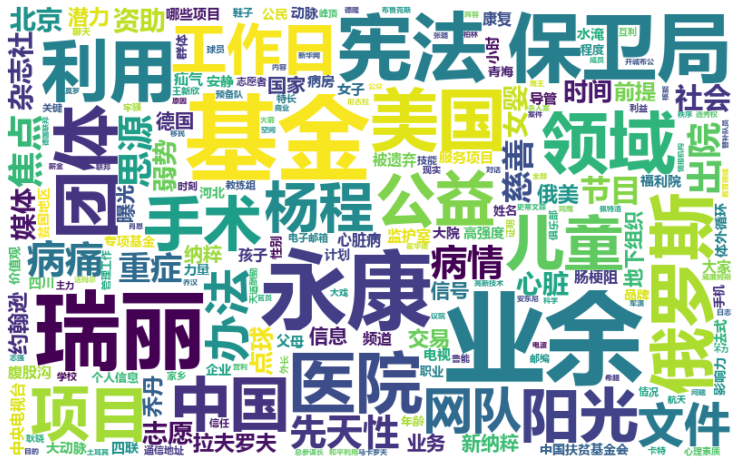

In [13]:
#Wordcloud

from wordcloud import WordCloud 
font = 'msyhbd.ttc'
wordcloud = WordCloud(background_color='white',width=800, height=500, random_state=21, max_font_size=110, font_path=font).generate(str(df1['cleaned'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud')

In [14]:
#Use CountVectorizer to get bigrams to visualize
from sklearn.feature_extraction.text import CountVectorizer
stop_words = open(r'C:\Users\admin\Desktop\stop-words.txt').read().split('\n')
# 作业二： 请补全下方函数中的参数，参数设置如下：
# 最大文档频：0.95
# 最小文档数：2
# 停用词表： stop_words
# 最大特征数：10000
# 考虑的 n-gram 范围：1-3

# (sklearn官方文档：https://scikit-learn.org/stable/modules/classes.html)
cv = CountVectorizer(ngram_range=(1,3),stop_words=stop_words,max_df=0.95,min_df=2,max_features=10000)
#CountVectorizer是通过fit_transform函数将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在第i个文本下的词频。即各个词语出现的次数，
#通过get_feature_names()可看到所有文本的关键字，通过toarray()可看到词频矩阵的结果。
X = cv.fit_transform(df1['cleaned'])

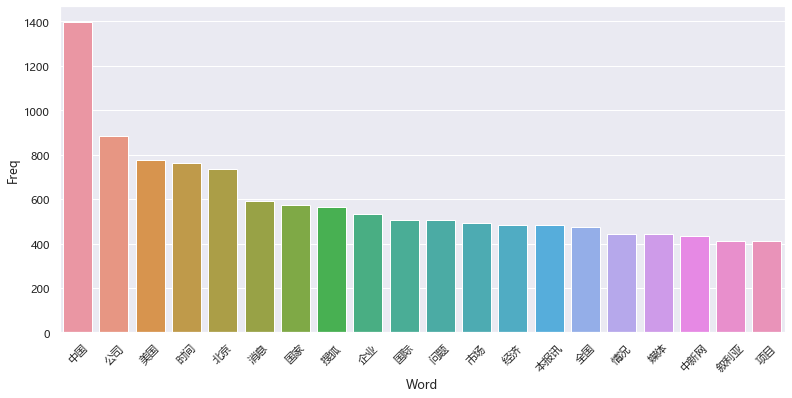

In [16]:
# Most frequently occuring words
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(df1['cleaned'])
    bag_of_words=vec.transform(df1['cleaned'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top_words = get_top_n_words(df1['cleaned'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

# barplot of most freq words
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r"C:\Windows\Fonts\msyhbd.ttc",size=14)
sns.set(rc={'figure.figsize':(13,6)}, font=myfont.get_name())
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
fig = g.get_figure()
fig.savefig("sns_output.png")

    Bi-gram  Freq
0    本报讯 记者   301
1     北京 时间   193
2     网络 信息   125
3    东方网 消息   124
4     搜狐 全国   123
5     全国 首例   123
6     首例 网络   123
7     信息 主题   123
8   主题 广播节目   123
9   广播节目 媒体   123
10  媒体 传统媒体   123
11  传统媒体 模式   123
12    模式 搜狐   123
13  搜狐 广播电台   123
14  广播电台 热情   123
15    热情 加盟   123
16    加盟 耳朵   123
17    耳朵 世界   123
18   世界 最强音   123
19    搜狐 节目   122


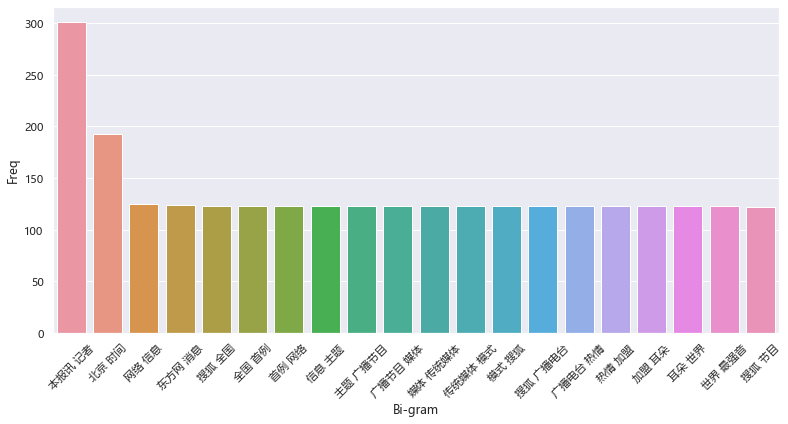

In [17]:
# Most frequently Co-occuring words
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(df1['data_nouns'])
    bag_of_words=vec1.transform(df1['data_nouns'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
# Convert most freq words to datafame for visuals

top2_words = get_top_n2_words(df1['data_nouns'], n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

# for bigram wordcloud
top100_words = get_top_n2_words(df1['data_nouns'], n=100)
top100_df = pd.DataFrame(top100_words)
top100_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

# barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)},font=myfont.get_name())
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
fig = h.get_figure()
fig.savefig("sns_output_bigrams.png")

In [46]:
top100_df.head()

,Bi-gram,Freq
0,本报讯 记者,301
1,北京 时间,193
2,网络 信息,125
3,东方网 消息,124
4,搜狐 全国,123


In [47]:
top100_df['Bi_gram'] = top100_df['Bi-gram'].str.replace(' ','_')
top100_df.head()

,Bi-gram,Freq,Bi_gram
0,本报讯 记者,301,本报讯_记者
1,北京 时间,193,北京_时间
2,网络 信息,125,网络_信息
3,东方网 消息,124,东方网_消息
4,搜狐 全国,123,搜狐_全国


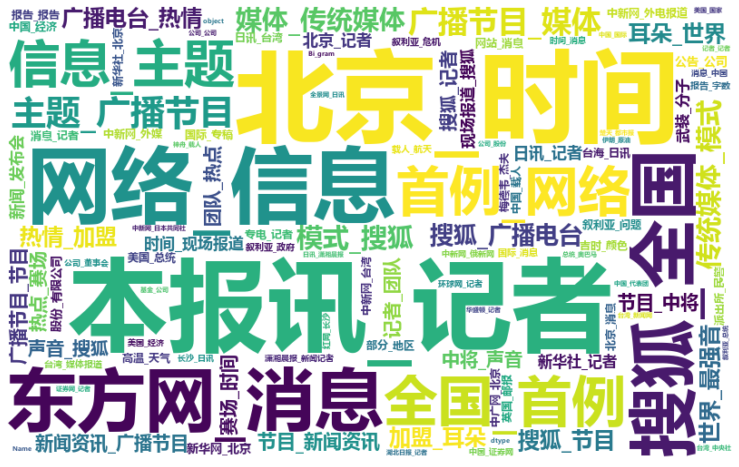

In [48]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color='white', font_path=font).generate(str(top100_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_bigram')

In [19]:
no_features = 10000

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words= stop_words, max_features=no_features, ngram_range=(1,1),
                                  analyzer='word')
tfidf = tfidf_vectorizer.fit_transform(df1['cleaned'])
# get the feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [21]:
print('Vocabulary has %d distinct terms' % len(tfidf_feature_names))

Vocabulary has 10000 distinct terms


The terms with the highest TF-IDF scores across all documents in the document-term matrix.

In [22]:
import operator
def rank_terms( tfidf, tfidf_feature_names ):
    # get the sums over each column
    sums = tfidf.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(tfidf_feature_names):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [23]:
ranking = rank_terms(tfidf, tfidf_feature_names)
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.0f)" % ( i+1, pair[0], pair[1] ) )

01. 中国 (88)
02. 搜狐 (79)
03. 公司 (71)
04. 美国 (61)
05. 时间 (58)
06. 北京 (52)
07. 节目 (44)
08. 企业 (44)
09. 消息 (44)
10. 市场 (43)
11. 国家 (43)
12. 经济 (42)
13. 全国 (42)
14. 媒体 (40)
15. 问题 (39)
16. 广播节目 (39)
17. 叙利亚 (38)
18. 国际 (38)
19. 本报讯 (36)
20. 项目 (35)


# NMF model fitting. 

In [24]:
no_topics = 40

In [28]:
n_samples=no_topics

In [30]:
# 作业三：请补全下方 NMF 函数中的参数，参数设置如下：
# 主题数： no_topics
# 随机数种子：1
# 正则项权重：0.1
# L1正则项权重：0.5
# 初始化方法：nndsvd
from sklearn.decomposition import NMF
# (sklearn官方文档：https://scikit-learn.org/stable/modules/classes.html)
#n_components：用于指定分解后矩阵的单个维度k，这个参数也可以看做，
#降维后希望留下的特征的数量；
nmf=NMF(n_components=no_topics,alpha=0.1,init='nndsvd',random_state=1,l1_ratio=0.5,).fit(tfidf)

In [31]:
def display_topics(model, feature_names, no_top_words):
    col1 = 'topic'
    col2 = 'top_ten_words'
    dct = {col1: [], col2: []}
    for topic_idx, topic in enumerate(model.components_):
        dct[col1].append(str(topic_idx))
        dct[col2].append(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return pd.DataFrame.from_dict(dct)

In [32]:
no_top_words = 10
topic_word = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word

,topic,top_ten_words
0,0,搜狐 广播节目 节目 传统媒体 最强音 耳朵 广播电台 首例 新闻资讯 现场报道
1,1,中国 北京 国际 国家 文化 全球 消息 关系 社会 越南
2,2,叙利亚 安南 联合国 阿萨德 反对派 大马士革 问题 巴沙尔 危机 暴力
3,3,公司 公告 股份 业绩 有限公司 净利润 股东 集团 董事会 证券
4,4,事故 车辆 人员 司机 现场 货车 交通事故 乘客 消防 路段
5,5,产品 食品 合格 理财产品 消费者 麦郎 显示器 能效 检疫局 质量
6,6,美国 奥巴马 总统 埃及 华盛顿 罗姆尼 数据 国家 希拉里 全球
7,7,报告 字数 编辑 用户 个人资料 黑名单 体会 会员 体验 频道
8,8,西班牙 欧元 欧洲央行 欧元区 德国 国债 意大利 希腊 债务 欧洲
9,9,价格 蔬菜 价格下降 羊肉 持平 教材 猪肉 鸡蛋 涨幅 农副产品


In [33]:
no_top_words = 3
topic_word_3 = display_topics(nmf, tfidf_feature_names, no_top_words)
topic_word_3['Theme'] = topic_word_3.top_ten_words.str.title()
topic_word_4 = topic_word_3.loc[:,['topic', 'Theme']]
topic_word_4

,topic,Theme
0,0,搜狐 广播节目 节目
1,1,中国 北京 国际
2,2,叙利亚 安南 联合国
3,3,公司 公告 股份
4,4,事故 车辆 人员
5,5,产品 食品 合格
6,6,美国 奥巴马 总统
7,7,报告 字数 编辑
8,8,西班牙 欧元 欧洲央行
9,9,价格 蔬菜 价格下降


In [34]:
# Merge the theme with the top_ten
topic_word = pd.merge(topic_word_4, topic_word, on ='topic')
topic_word

,topic,Theme,top_ten_words
0,0,搜狐 广播节目 节目,搜狐 广播节目 节目 传统媒体 最强音 耳朵 广播电台 首例 新闻资讯 现场报道
1,1,中国 北京 国际,中国 北京 国际 国家 文化 全球 消息 关系 社会 越南
2,2,叙利亚 安南 联合国,叙利亚 安南 联合国 阿萨德 反对派 大马士革 问题 巴沙尔 危机 暴力
3,3,公司 公告 股份,公司 公告 股份 业绩 有限公司 净利润 股东 集团 董事会 证券
4,4,事故 车辆 人员,事故 车辆 人员 司机 现场 货车 交通事故 乘客 消防 路段
5,5,产品 食品 合格,产品 食品 合格 理财产品 消费者 麦郎 显示器 能效 检疫局 质量
6,6,美国 奥巴马 总统,美国 奥巴马 总统 埃及 华盛顿 罗姆尼 数据 国家 希拉里 全球
7,7,报告 字数 编辑,报告 字数 编辑 用户 个人资料 黑名单 体会 会员 体验 频道
8,8,西班牙 欧元 欧洲央行,西班牙 欧元 欧洲央行 欧元区 德国 国债 意大利 希腊 债务 欧洲
9,9,价格 蔬菜 价格下降,价格 蔬菜 价格下降 羊肉 持平 教材 猪肉 鸡蛋 涨幅 农副产品


In [35]:
nmf_W = nmf.transform(tfidf)
nmf_H = nmf.components_

In [36]:
df2 = pd.DataFrame({'topic': nmf_W.argmax(axis=1),
                   'Doc_Id': df1['Doc_Id'],
                   'content': df1['content']},
                  columns = ['topic', 'Doc_Id', 'content'])

In [37]:
def showdocs(df2, topics, nshow=5 ): # nshow= len(df1)
    idx = df2.topic == topics[0]
    for i in range(1, len(topics)):
        idx = idx | (df2.topic == topics[i])
    return df2[idx].groupby('topic').head(nshow).sort_values('topic')

In [38]:
numbers = tuple(list(range(0, no_topics)))

In [39]:
final = showdocs(df2, numbers)
final.head(10)

,topic,Doc_Id,content
386,0,338,《，搜狐，－，天下，体育，》，是，全国，首例，以，网络，信息，为，主题，的，广播节目，，，也，是，首个，新，媒体，跨入，传统媒体，的，全新，合作，模式，。，《，搜狐，－，天下，体育，》，节目，为，体育，新闻资讯，类，广播节目，，，每期，节目，中将，有，６，０，％，的，前方，采访，原，声音，频，，，搜狐，体育，强大，记者，报道，团队，，，将，在，每，一个，热点，赛场，第一，时间，发回，现场报道，。，《，搜狐，－，天下，体育，》，诚邀，各地，广播电台，热情，加盟，。，联系电话，：， ，０，１，０，－，６，２，７，２，８，１，９，１， ，ｑ，ｑ，：，３，８，１，８，２，０，５，１，５， ，ｌ，ｅ，ｉ，ｐ，ｅ，ｎ，ｇ，＠，ｓ，ｏ，ｈ，ｕ，－，ｉ，ｎ，ｃ，．，ｃ，ｏ，ｍ，“，《，天下，体育，》，，，用，你，的，耳朵，聆听，体育，世界，的，最强音，！，”
160,0,132,女人，是，天生，的，慈善家，，，强烈，的，母性，让，她们，关注，一切，需要，帮助，的，人群，；，而，女人，对于，慈善事业，的，帮助，，，正，体现，了，人们，心底，深处，最，柔软，的，部分，。，，搜狐，公益，在，“，３，－，８，妇女节，”，选择，了，５，位，热心，公益，的，女性，，，以，彰显，女性，在，公益事业，中，的，力量，与，温暖，。，当然，，，她们，只是，冰山一角，，，她们，身后，有，千千万万个，富有，爱心，、，公益，心，的，姐妹，们，。，正，因为，有，了，这些，无私，的，女性，，，有，需要，的，人才，得到，帮助，，，爱，也，在，她们，的，身上，向，更，广，的，人群，传递，。
280,0,241,《，搜狐，－，天下，体育，》，是，全国，首例，以，网络，信息，为，主题，的，广播节目，，，也，是，首个，新，媒体，跨入，传统媒体，的，全新，合作，模式，。，《，搜狐，－，天下，体育，》，节目，为，体育，新闻资讯，类，广播节目，，，每期，节目，中将，有，６，０，％，的，前方，采访，原，声音，频，，，搜狐，体育，强大，记者，报道，团队，，，将，在，每，一个，热点，赛场，第一，时间，发回，现场报道，。，《，搜狐，－，天下，体育，》，诚邀，各地，广播电台，热情，加盟，。，联系电话，：， ，０，１，０，－，６，２，７，２，８，１，９，１， ，ｑ，ｑ，：，３，８，１，８，２，０，５，１，５， ，ｌ，ｅ，ｉ，ｐ，ｅ，ｎ，ｇ，＠，ｓ，ｏ，ｈ，ｕ，－，ｉ，ｎ，ｃ，．，ｃ，ｏ，ｍ，“，《，天下，体育，》，，，用，你，的，耳朵，聆听，体育，世界，的，最强音，！，”
513,0,454,６，月，２，０，日，“，外语，中文，译写，规范，部际，联席会议，专家，委员会，”，成立，。，外语，中文，译写，规范，部际，联席会议，由，国家语委，牵头，、，中央，外宣，办，、，中央，编译局，、，外交部，、，民政部，、，广电总局，、，新闻出版，总署，、，新华社，、，中科院，等，１，０，个，部门，和，单位，组成，。，今后，，，专家，委员会，作为，联席会议，协调，机制，的，重要，智库，，，将，负责，审定，外语，中文，译写，的，规则，规范，，，逐步，统一，已有，外语，词，中文，译名，及其，简称，的，译名，，，审定，或，裁定，新，出现，的，外语，词，中文，译名，及，新，创制，的，中文，译名，简称，等，。
321,0,279,《，搜狐，－，天下，体育，》，是，全国，首例，以，网络，信息，为，主题，的，广播节目，，，也，是，首个，新，媒体，跨入，传统媒体，的，全新，合作，模式，。，《，搜狐，－，天下，体育，》，节目，为，体育，新闻资讯，类，广播节目，，，每期，节目，中将，有，６，０，％，的，前方，采访，原，声音，频，，，搜狐，体育，强大，记者，报道，团队，，，将，在，每，一个，热点，赛场，第一，时间，发回，现场报道，。，《，搜狐，－，天下，体育，》，诚邀，各地，广播电台，热情，加盟，。，联系电话，：， ，０，１，０，－，６，２，７，２，８，１，９，１， ，ｑ，ｑ，：，３，８，１，８，２，０，５，１，５， ，ｌ，ｅ，ｉ，ｐ，ｅ，ｎ，ｇ，＠，ｓ，ｏ，ｈ，ｕ，－，ｉ，ｎ，ｃ，．，ｃ，ｏ，ｍ，“，《，天下，体育，》，，，用，你，的，耳朵，聆听，体育，世界，的，最强音，！，”
89,1,72,“，当，你老，了，，，两鬓，斑白，，，沉沉，欲，睡，…，…，”，中国，人，欣赏，爱尔兰，诗人，叶芝，在，《，当，你老，了，》，中，所，描绘，的，爱情，。，但，当，中国，社会，进入，老龄化，阶段，，，并，正在，快速，进入，深度，老龄化，社会，之际，，，越来越，多，的，普通，中国，人，在，思考，“，当，我，老去，”，这个，问题，时，，，所，想到，的，问题，却，往往，没有，诗中，的，浪漫，。，２，０，１，１，年，以后，的，３，０，年里，，，中国，人口老龄化，将，呈现，加速，发展，态势，，，到，２，０，３，０，年，，，中国，将，成为，全球，老龄化，程度，最高，的，国家，。，当，我们，老，了，，，我能，想到，最，浪漫，的，事，是，与子偕老，，，最，不，浪漫，的，事，是，催债，鬼，敲门，。，所以，，，２，０，年，后，谁，来，养活，中国，，，这，是，个，大，问题，。
481,1,424,台海，网，７，月，２，８，日讯， ，民进党，已经，设置，“，中国，事务部，”，，，紧接着，要，成立，“，委员会，”，整合，党内，声音，，，“，中国，事务，委员会，”，（，名称，未定，），主委，人选，备受瞩目，。，前，“，立委，”，郭正亮，接受，中，评社，访问，时，表示，，，党，主席，苏贞昌，应该，会，亲自，主导，两岸，事务，，，假手他人，的，可能性，不，大，，，甚至，不能，排除，党，主席，兼任，“，中国，事务，委员会，主委，”，。，，原先，被，视为，“，中国，事务，委员会，主委，”，热门，人选，的，重量级，中，常委，谢长廷，，，日，来，不时，释放，“，有人，反对，我，，，但，也，有人，赞成，”，，，“，纵使，不，代表，民进党，，，也，可以，用，个人，身分，访中，”，，，嗅觉，敏锐，的，党内人士，臆测，，，，谢长廷，接任，“，中国，事务，委员会，主委，”，的，机会，下降，。
438,1,386,中新社，上海，６，月，３，０，日电，（，记者， ，郑，莹莹，），苏格兰，皇家，银行，集团，亚太区，主席，麦高铭，３，０，日，在，上海，举行，的，２，０，１，２，陆家嘴，论坛，上，提醒，中国，需谨慎，在，欧洲，的，投资，。，他称，目前，欧洲，有，好，的，投资，机会，，，但，也，可能，存在，陷阱，。，，麦高铭，认为，，，中国，不，应该，、，也，不，能够，用，其，外汇储备，来，购买，公司债务，等，一些，高风险，产品，。，他，介绍，说，，，中国，的，外汇储备，已有，２，５，％，进行，欧元，资产，投资，。，２，０，１，０，至，２，０，１，１，年，期间，，，中国，机构，所，购买，的，欧元，资产，最终，都，是，亏损，的，。
439,1,387,６，月，２，６，日，，，中国，优质，农产品，开发，服务，协会，等，七家，协会，联合，在，北京，举行，“，２，０，１，２，中国，农业，品牌，发展，推进，会，”，。，农业部，副，部长，、，中国，绿色食品，协会会长，陈晓华，指出，，，当前，，，我国，农业，发展，已经，到，了，大力加强，品牌，建设，的，发展，阶段，，，农业，发展，方式，转变，、，农业，企业，转型，、，农产品，消费，升级，和，提高，市场，竞争力，，，都，要求，进一步，加快，农业，品牌，建设，步伐，。，，陈晓华，表示，，，近，二十年，来，，，农业部，大力，实施，农业，标准化，，，深入，推进，农业，产业化，，，出台，了，加强，农业，品牌，建设，的，指导性，意见，，，推动，各地，培育，打造，了，一批，品牌，农产品，，，农业，品牌，建设，取得，了，积极，进展，。
167,1,138,中国，老龄化，速度，之快，前所未有，。，到，２，０，３，９，年，，，我国，将，出现，不足，两个，纳税人，供养，一个，养老金，领取，者，的，局面，，，这，被，称为，“，老龄，社会，危机，时，点，”，。，而，反观，现状，，，我国，在，应对，这场，危机，上，还，存在，包括，制度，、，保障，、，服务，等，多层面，的，薄弱环节，。，，在，这场，关注，老龄化，的，浪潮，中，，，争议，最大，也，是，最，直接，的，，，是，“， ，钱， ，”，的，问题，。，待遇，差别，大，，，存在，制度性，结构，缺陷，也，是，颇为，尖锐，的，问题，。，，未富，先，老，，，已，成为，中国，现代化，进程，中，巨大，的，隐患，与，挑战，。


In [40]:
# save for use later
final.to_pickle('model.pkl')

In [41]:
topic_word.to_pickle('topic_word.pkl')